In [1]:
run='BBM01'


In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import cartopy.feature as cfeature 
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np
import numpy.ma as ma
import matplotlib as mpl
import matplotlib.path as mpath
import matplotlib.cm as cm

import cmocean

In [3]:
dir='/gpfsstore/rech/cli/rote001/NANUK12/NANUK12_ICE-'+run+'-S'
files=dir+'/*/NANUK12_ICE-'+run+'_1d_*_icemod.nc4'
ds=xr.open_mfdataset(files)
dsg=xr.open_dataset('/gpfswork/rech/cli/rote001/NANUK12.L31/NANUK12.L31-I/mesh_mask_NANUK12_L31_4.2.nc')


In [4]:
tmasks=dsg.tmaskutil
lat=dsg.nav_lat
lon=dsg.nav_lon

In [5]:
def plot2D(var, cmap, vmin, vmax, name):
    varf=ds[var][-1]
    varfm=np.ma.array(varf,mask=1-tmasks)

    plt.figure(figsize=(15, 15))
    ax = plt.axes() 

    myice=cmap
    myice.set_bad('grey', 1)
    plt.pcolormesh(varfm,cmap=myice,vmin=vmin,vmax=vmax)
    plt.colorbar()
    plt.title('Final state of '+name+' for simulation '+str(run)+' '+np.datetime_as_string(ds.time_counter[-1], unit='D'))
    plt.savefig('plots/map-'+np.datetime_as_string(ds.time_counter[-1], unit='D')+'-run-'+str(run)+'-'+var+'.png',bbox_inches='tight')

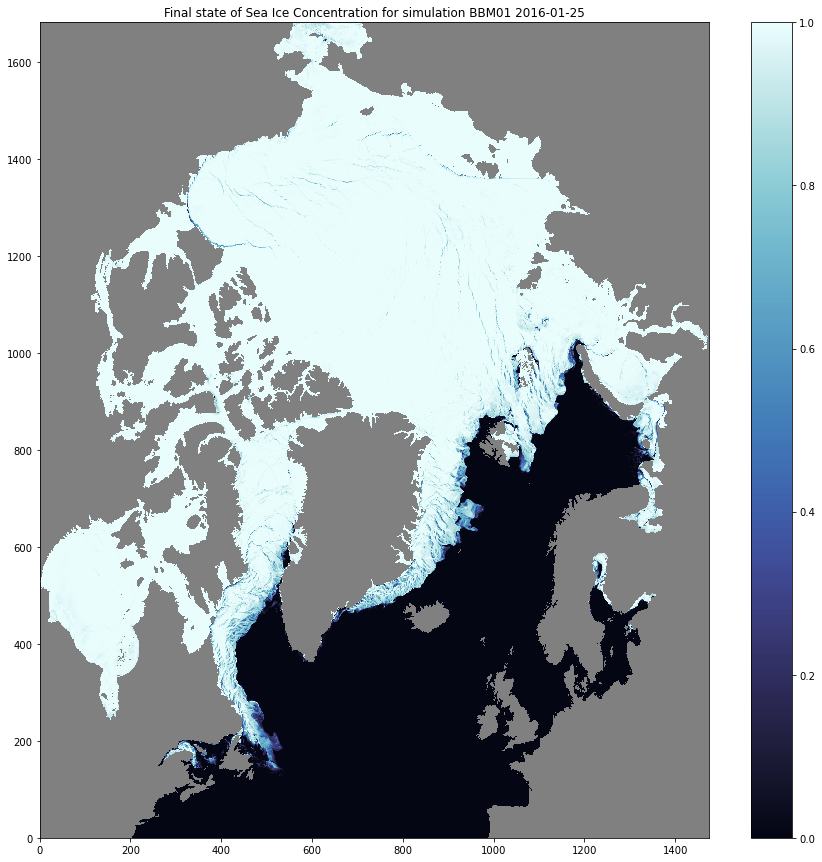

In [6]:
plot2D('siconc',cmocean.cm.ice,0,1,'Sea Ice Concentration')

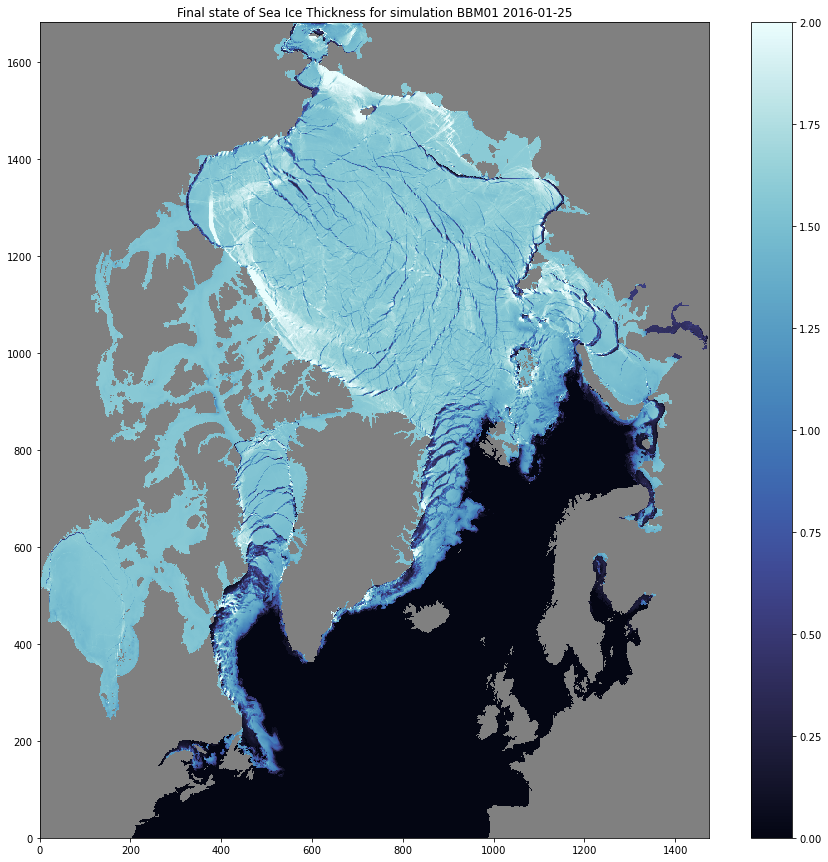

In [7]:
plot2D('sithic',cmocean.cm.ice,0,2,'Sea Ice Thickness')

<ipython-input-5-21194bf34c30>:9: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("bone"))
  myice.set_bad('grey', 1)


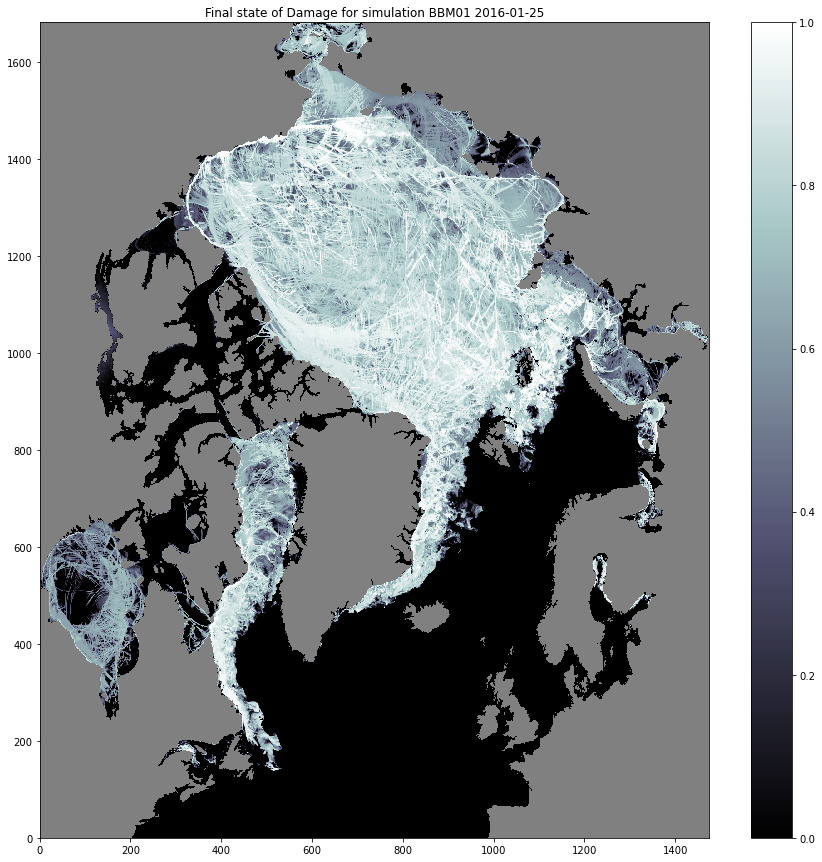

In [8]:
plot2D('damage-t',plt.cm.get_cmap('bone'),0,1,'Damage')